# Multimessenger - Supernova

Following the other two notebooks on how the package works and how the data are sampled. <br>
Let's simulate some signal.

### Models

In [7]:
import numpy as np
import astropy.units as u
from snewpy.neutrino import Flavor
from multimessenger.supernova import Supernova_Models
import matplotlib.pyplot as plt
plt.style.use('customstyle.mplstyle')
from matplotlib.colors import LogNorm

In [3]:
# create nakazato model 
SN_Nakazato = Supernova_Models.Models("Nakazato_2013", config_file="./local_conf.conf")
# call the model by filename or index
SN_Nakazato(index=5) # brings the attributes

> Nakazato_2013 is created, load a progenitor by function call.
> You chose ~wisely~ ->	   [5]	nakazato-shen-z0.004-t_rev200ms-s13.0.fits
>>>>> Nakazato_2013-nakazato-shen-z0_004-t_rev200ms-s13_0_fits.pickle
> Retrieving object self.storageNakazato_2013-nakazato-shen-z0_004-t_rev200ms-s13_0_fits.pickle


/mnt/c/Users/bj7780/Desktop/Kara/GitHub/XENON/multimessenger/multimessenger/supernova/snewpy_models.py:85: FutureWarning: Initializing this model with a filename is deprecated. Instead, use keyword arguments ['progenitor_mass', 'revival_time', 'metallicity', 'eos']. See `Nakazato_2013.param`, `Nakazato_2013.get_param_combinations()` for more info.
  models_dict[self.name](f)
/mnt/c/Users/bj7780/Desktop/Kara/GitHub/XENON/multimessenger/multimessenger/supernova/snewpy_models.py:66: FutureWarning: Initializing this model with a filename is deprecated. Instead, use keyword arguments ['progenitor_mass', 'revival_time', 'metallicity', 'eos']. See `Nakazato_2013.param`, `Nakazato_2013.get_param_combinations()` for more info.
  model = models_dict[self.name](file_to_load, **model_kwargs)


We can now compute the fluxes and scale them at any distance. 

In [6]:
# alternativley you can change them on the fly
SN_Nakazato.compute_model_fluxes(neutrino_energies=np.linspace(0, 150, 200), force=1)
fluxes_at10 = SN_Nakazato.scale_fluxes(distance=10)

Looping:   0%|          | 0/391 [00:00<?, ?it/s]

> Saved at <self.storage>/Nakazato_2013-nakazato-shen-z0_004-t_rev200ms-s13_0_fits.pickle!



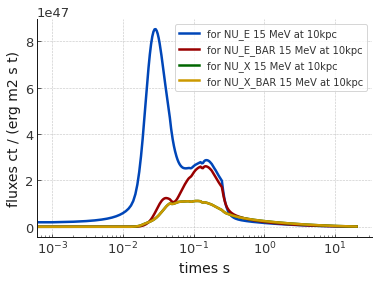

In [10]:
for f in Flavor:
    plt.semilogx(SN_Nakazato.times, fluxes_at10[f][:,20], label=f'for {f.name} {SN_Nakazato.neutrino_energies[20]:.0f} '\
                                                                          'at 10kpc')
plt.legend()
plt.xlabel(f"times {SN_Nakazato.times.unit}")
plt.ylabel(f"fluxes {fluxes_at10[Flavor.NU_E].unit}");

### Target

In [11]:
from multimessenger.supernova.Nucleus import Target
from multimessenger.supernova.Xenon_Atom import ATOM_TABLE
from multimessenger.supernova.interactions import Interactions

In [12]:
singleXe = Target(ATOM_TABLE['Xe131'], pure=True) # pure means setting the abundance to =1 
singleXe

### The Target<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Values</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Type</th>
      <td>Xe131</td>
    </tr>
    <tr>
      <th>MassNum</th>
      <td>131</td>
    </tr>
    <tr>
      <th>AtomicNum</th>
      <td>54</td>
    </tr>
    <tr>
      <th>Mass</th>
      <td>130.905082</td>
    </tr>
    <tr>
      <th>Spin</th>
      <td>1.5</td>
    </tr>
    <tr>
      <th>Fraction</th>
      <td>0.212324</td>
    </tr>
  </tbody>
</table>
</div><br>


In [13]:
# recoil_en = np.linspace(0,30,100) * u.keV
# neutrino_en = SN_Nakazato.neutrino_energies

# formfac = singleXe.form_factor(np.linspace(0,150,100) * u.keV)
# crosssec = singleXe.nN_cross_section(neutrino_en, recoil_en)

### Interactions
Now let's pass -or tell interactions to use this nuclei together with the nakazato model

In [15]:
Int = Interactions(SN_Nakazato, Nuclei='Xenon', isotope='mix')

> Saved at <self.storage>/Nakazato_2013-nakazato-shen-z0_004-t_rev200ms-s13_0_fits_interaction.pickle!



In [16]:
Int.compute_interaction_rates(force=1)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)


Now we have differential rates over time and over recoil energies as follows;
$$\frac{dR}{dE_R} = \sum_{\nu_\beta} N_{Xe}
               \int_{E_{min}^{\nu}} dE_\nu f_\nu(E_\nu)\frac{d\sigma}{dE_R}(E_\nu, E_R)$$
               
$$\frac{dR}{dt} = \sum N_{Xe}\int_{E_{min}^\nu} = f_\nu(E_\nu,t)
               \int_{E_{R}^{min}}^{E_{R}^{max}} dE_R \frac{d\sigma}{dE_R}(E_\nu, E_R)$$

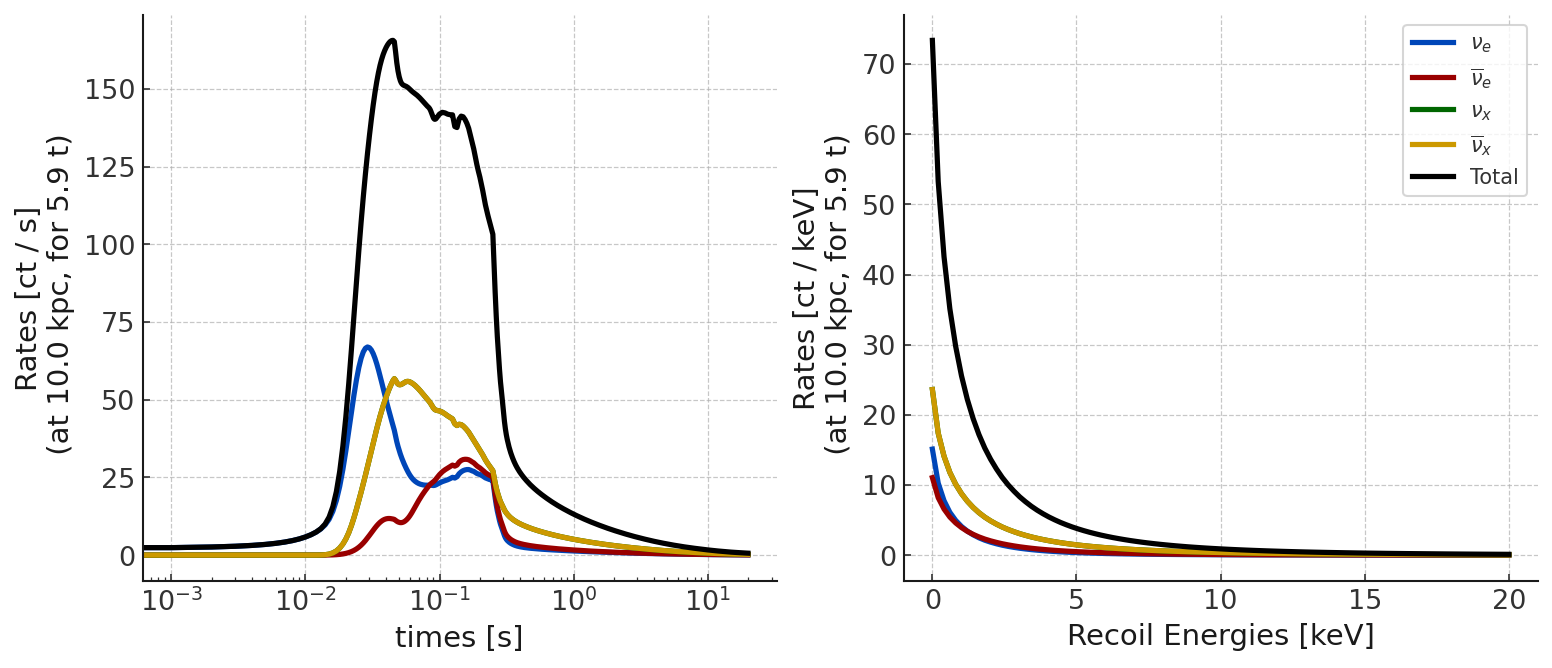

In [18]:
Int.scale_rates(distance=10, volume=5.9)
Int.plot_rates(scaled=True)

$\frac{dR}{dE_R} = \sum_{\nu_\beta} N_{Xe}
               \int_{E_{min}^{\nu}} dE_\nu f_\nu(E_\nu)\frac{d\sigma}{dE_R}(E_\nu, E_R)$
               
$\frac{dR}{dt} = \sum N_{Xe}\int_{E_{min}^\nu} = f_\nu(E_\nu,t)
               \int_{E_{R}^{min}}^{E_{R}^{max}} dE_R \frac{d\sigma}{dE_R}(E_\nu, E_R)$

## Simulate

In [ ]:
# st = cutax.context.
# Int.simulate_automatically()